In [1]:
import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./processed_data_course_based.csv')
df

,Student Number,Course Title,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Grade 1 Rate,Grade 2 Rate,Grade 3 Rate,Grade 4 Rate,Grade 5 Rate,Mean Grade,STDEV Grade,Mean GPA,STDEV GPA,Department Code
0,0,Ideological and Moral Cultivation and Legal Fo...,2.5,4,1,3.102564,19.5,3.102564,19.5,0.000000,0.023560,0.486911,0.408377,0.081152,3.547120,0.677055,3.307021,0.516455,BLG
1,0,Success: Career Planning,1.0,3,1,3.102564,19.5,3.102564,19.5,0.005236,0.086387,0.557592,0.052356,0.298429,3.552356,1.025211,3.307021,0.516455,BLG
2,0,Introduction to Computer Science,2.0,1,1,3.102564,19.5,3.102564,19.5,0.007853,0.107330,0.358639,0.429319,0.096859,3.500000,0.841040,3.307021,0.516455,BLG
3,0,Advanced Mathematics A(1),5.5,4,1,3.102564,19.5,3.102564,19.5,0.143979,0.193717,0.204188,0.240838,0.217277,3.193717,1.359003,3.307021,0.516455,BLG
4,0,College English A(1),4.0,3,1,3.102564,19.5,3.102564,19.5,0.028796,0.256545,0.439791,0.253927,0.020942,2.981675,0.843178,3.307021,0.516455,BLG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,381,J2EE Framework,4.5,3,6,2.790076,131.0,2.800000,20.0,0.007853,0.120419,0.348168,0.400524,0.123037,3.510471,0.886555,3.220775,0.515869,BLG
19096,381,Intellectual Property and Software Protection,1.0,4,7,2.838129,139.0,3.625000,8.0,0.000000,0.151832,0.227749,0.366492,0.253927,3.722513,1.007305,3.241516,0.494006,BLG
19097,381,Human-Computer Interaction Technology,2.0,5,7,2.838129,139.0,3.625000,8.0,0.000000,0.060209,0.413613,0.408377,0.117801,3.583770,0.774968,3.241516,0.494006,BLG
19098,381,Software Development and Testing Training,3.0,3,7,2.838129,139.0,3.625000,8.0,0.000000,0.018325,0.476440,0.463351,0.041885,3.528796,0.608736,3.241516,0.494006,BLG


In [3]:
# df.drop([df.columns[0], df.columns[1], df.columns[2]], inplace=True, axis=1)   # dropping course details
# df.drop([df.columns[0], df.columns[1]], inplace=True, axis=1)   # dropping course details
# df
df.drop([df.columns[0], df.columns[1]] ,inplace=True, axis=1)

In [4]:
# df['Status'] = df['Grades'].apply(lambda x: 'Unsuccessful' if x == 1 else 'Successful')
# df
df["Course Level"] = "Undergraduate"
df['Status'] = np.where(df['Grades'] != 1, 'Successful', 'Unsuccessful')
conditions = [
    (df['Course Semester'] <= 2),
    (df['Course Semester'] >= 3) & (df['Course Semester'] <= 4),
    (df['Course Semester'] >= 5) & (df['Course Semester'] <= 6),
    (df['Course Semester'] == 7)
]

choices = ['Freshman', 'Sophomore', 'Junior', 'Senior']

# Create the new 'standing' column
df['Standing'] = np.select(conditions, choices, default=None)

# Create Course Year column
choices = [1, 2, 3, 4]

df["Course Year"] = np.select(conditions, choices, default=None)
df

,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Grade 1 Rate,Grade 2 Rate,Grade 3 Rate,...,Grade 5 Rate,Mean Grade,STDEV Grade,Mean GPA,STDEV GPA,Department Code,Course Level,Status,Standing,Course Year
0,2.5,4,1,3.102564,19.5,3.102564,19.5,0.000000,0.023560,0.486911,...,0.081152,3.547120,0.677055,3.307021,0.516455,BLG,Undergraduate,Successful,Freshman,1
1,1.0,3,1,3.102564,19.5,3.102564,19.5,0.005236,0.086387,0.557592,...,0.298429,3.552356,1.025211,3.307021,0.516455,BLG,Undergraduate,Successful,Freshman,1
2,2.0,1,1,3.102564,19.5,3.102564,19.5,0.007853,0.107330,0.358639,...,0.096859,3.500000,0.841040,3.307021,0.516455,BLG,Undergraduate,Unsuccessful,Freshman,1
3,5.5,4,1,3.102564,19.5,3.102564,19.5,0.143979,0.193717,0.204188,...,0.217277,3.193717,1.359003,3.307021,0.516455,BLG,Undergraduate,Successful,Freshman,1
4,4.0,3,1,3.102564,19.5,3.102564,19.5,0.028796,0.256545,0.439791,...,0.020942,2.981675,0.843178,3.307021,0.516455,BLG,Undergraduate,Successful,Freshman,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,4.5,3,6,2.790076,131.0,2.800000,20.0,0.007853,0.120419,0.348168,...,0.123037,3.510471,0.886555,3.220775,0.515869,BLG,Undergraduate,Successful,Junior,3
19096,1.0,4,7,2.838129,139.0,3.625000,8.0,0.000000,0.151832,0.227749,...,0.253927,3.722513,1.007305,3.241516,0.494006,BLG,Undergraduate,Successful,Senior,4
19097,2.0,5,7,2.838129,139.0,3.625000,8.0,0.000000,0.060209,0.413613,...,0.117801,3.583770,0.774968,3.241516,0.494006,BLG,Undergraduate,Successful,Senior,4
19098,3.0,3,7,2.838129,139.0,3.625000,8.0,0.000000,0.018325,0.476440,...,0.041885,3.528796,0.608736,3.241516,0.494006,BLG,Undergraduate,Successful,Senior,4


In [5]:
def get_course_year(semester):
    if semester in [1, 2]:
        return 1
    elif semester in [3, 4]:
        return 2
    elif semester in [5, 6]:
        return 3
    elif semester == 7:
        return 4
    else:
        return None  # in case there are unexpected values

In [8]:
df['Course Year'] = df['Course Semester'].apply(get_course_year)
df

,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Department Code,Status,Course Year
0,2.5,4,1,3.102564,19.5,3.102564,19.5,BLG,Successful,1
1,1.0,3,1,3.102564,19.5,3.102564,19.5,BLG,Successful,1
2,2.0,1,1,3.102564,19.5,3.102564,19.5,BLG,Unsuccessful,1
3,5.5,4,1,3.102564,19.5,3.102564,19.5,BLG,Successful,1
4,4.0,3,1,3.102564,19.5,3.102564,19.5,BLG,Successful,1
...,...,...,...,...,...,...,...,...,...,...
19095,4.5,3,6,2.790076,131.0,2.800000,20.0,BLG,Successful,3
19096,1.0,4,7,2.838129,139.0,3.625000,8.0,BLG,Successful,4
19097,2.0,5,7,2.838129,139.0,3.625000,8.0,BLG,Successful,4
19098,3.0,3,7,2.838129,139.0,3.625000,8.0,BLG,Successful,4


In [5]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Standing'], prefix='Standing'), pd.get_dummies(df['Status'], prefix='Status')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Status', 'Standing'], axis=1, inplace=True)

In [9]:
# course year ve status icin get dummies alinabilir sadece, department code da manasiz 
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Status'], prefix='Status')], axis=1)
df.drop(['Course Year', 'Department Code', 'Status'], axis=1, inplace=True)
df

,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Status_Successful,Status_Unsuccessful
0,2.5,4,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0
1,1.0,3,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0
2,2.0,1,1,3.102564,19.5,3.102564,19.5,1,0,0,0,0,1
3,5.5,4,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0
4,4.0,3,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,4.5,3,6,2.790076,131.0,2.800000,20.0,0,0,1,0,1,0
19096,1.0,4,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0
19097,2.0,5,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0
19098,3.0,3,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0


In [6]:
columns = df.columns

In [11]:
df.columns

Index(['Course Credit', 'Grades', 'Course Semester', 'GPA',
       'Completed Credits', 'Semester GPA', 'Semester Credit', 'Course Year_1',
       'Course Year_2', 'Course Year_3', 'Course Year_4', 'Status_Successful',
       'Status_Unsuccessful'],
      dtype='object')

In [12]:
grade_mapping = {
    1: 'F',
    2: 'D',
    3: 'C',
    4: 'B',
    5: 'A'
}

In [13]:
df['Letter Grade'] = df['Grades'].map(grade_mapping)
df

,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Status_Successful,Status_Unsuccessful,Letter Grade
0,2.5,4,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,B
1,1.0,3,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,C
2,2.0,1,1,3.102564,19.5,3.102564,19.5,1,0,0,0,0,1,F
3,5.5,4,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,B
4,4.0,3,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,4.5,3,6,2.790076,131.0,2.800000,20.0,0,0,1,0,1,0,C
19096,1.0,4,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0,B
19097,2.0,5,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0,A
19098,3.0,3,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0,C


In [7]:
le = LabelEncoder()
# le.fit(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])
# le.fit(['F', 'D', 'C', 'B', 'A'])
le.fit(['1', '2', '3', '4', '5'])

LabelEncoder()

In [8]:
def standardize(X_train, X_test):
    X_train_cols = X_train.columns
    X_test_cols = X_test.columns
    sc = StandardScaler()
    fitted_sc = sc.fit(X_train)
    X_train_std = pd.DataFrame(fitted_sc.transform(X_train), columns=X_train_cols)
    X_test_std = pd.DataFrame(fitted_sc.transform(X_test), columns=X_test_cols)
    return X_train_std, X_test_std

In [9]:
df

,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Grade 1 Rate,Grade 2 Rate,Grade 3 Rate,...,Course Year_3,Course Year_4,Department Code_BLG,Course Level_Undergraduate,Standing_Freshman,Standing_Junior,Standing_Senior,Standing_Sophomore,Status_Successful,Status_Unsuccessful
0,2.5,4,1,3.102564,19.5,3.102564,19.5,0.000000,0.023560,0.486911,...,0,0,1,1,1,0,0,0,1,0
1,1.0,3,1,3.102564,19.5,3.102564,19.5,0.005236,0.086387,0.557592,...,0,0,1,1,1,0,0,0,1,0
2,2.0,1,1,3.102564,19.5,3.102564,19.5,0.007853,0.107330,0.358639,...,0,0,1,1,1,0,0,0,0,1
3,5.5,4,1,3.102564,19.5,3.102564,19.5,0.143979,0.193717,0.204188,...,0,0,1,1,1,0,0,0,1,0
4,4.0,3,1,3.102564,19.5,3.102564,19.5,0.028796,0.256545,0.439791,...,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,4.5,3,6,2.790076,131.0,2.800000,20.0,0.007853,0.120419,0.348168,...,1,0,1,1,0,1,0,0,1,0
19096,1.0,4,7,2.838129,139.0,3.625000,8.0,0.000000,0.151832,0.227749,...,0,1,1,1,0,0,1,0,1,0
19097,2.0,5,7,2.838129,139.0,3.625000,8.0,0.000000,0.060209,0.413613,...,0,1,1,1,0,0,1,0,1,0
19098,3.0,3,7,2.838129,139.0,3.625000,8.0,0.000000,0.018325,0.476440,...,0,1,1,1,0,0,1,0,1,0


In [18]:
def get_train_data(df, train_sem, columns):
    dataFrame = pd.DataFrame(columns=columns)
    for sem in train_sem:
        dataFrame = pd.concat([dataFrame, df[df.iloc[:, 2] == sem]], ignore_index=True)
    
    X_train = dataFrame.drop('Course Semester', axis=1)
    y_train = le.transform(X_train.pop('Grades'))
    # y_train = X_train.pop('Grades')
    return X_train, y_train

In [70]:
df

,Course Credit,Grades,Course Semester,GPA,Completed Credits,Semester GPA,Semester Credit,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Status_Successful,Status_Unsuccessful,Letter Grade
0,2.5,4,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,B
1,1.0,3,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,C
2,2.0,1,1,3.102564,19.5,3.102564,19.5,1,0,0,0,0,1,F
3,5.5,4,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,B
4,4.0,3,1,3.102564,19.5,3.102564,19.5,1,0,0,0,1,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,4.5,3,6,2.790076,131.0,2.800000,20.0,0,0,1,0,1,0,C
19096,1.0,4,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0,B
19097,2.0,5,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0,A
19098,3.0,3,7,2.838129,139.0,3.625000,8.0,0,0,0,1,1,0,C


In [15]:
def get_error_score(df, columns, model):
    error_scores = {}
    sorted_semesters = sorted(set(df.iloc[:, 2]))
    print(sorted_semesters)
    for sem_idx in range(1, len(sorted_semesters)):
        training_sem = sorted_semesters[:sem_idx]
        print(f"training sem: {training_sem}")
        test_sem = sorted_semesters[sem_idx]
        print(f"test sem: {test_sem}")
        X_train, y_train = get_train_data(df, training_sem, columns)
        X_test = df[df.iloc[:, 2] == test_sem]
        X_test.drop('Course Semester', axis=1, inplace=True)
        y_test = le.transform(X_test.pop('Grades'))
        print(f"Train size  X: {len(X_train)}, Test size: {len(X_test)}")
        print(f"Train size Y : {len(y_train)}, Test size: {len(y_test)}")
        # y_test = X_test.pop('Grades')
        
        # X_train, X_test = standardize(X_train, X_test)
        model.fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        print(f"y test {y_test}" )
        print(f"y pred test {y_pred_test}" )
        rmse_test = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 3)
        # print(f"rmse_test {rmse_test}" )

        mae_test = round(mean_absolute_error(y_test, y_pred_test), 3)
        
        y_pred_train = model.predict(X_train)
        rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 3)
        mae_train = round(mean_absolute_error(y_train, y_pred_train),3)
        
        error_scores.setdefault(sem_idx, {})
        error_scores[sem_idx]['rmse'] = [rmse_train, rmse_test]
        error_scores[sem_idx]['mae'] = [mae_train, mae_test]     
        # print(error_scores)   
        
    return error_scores

In [16]:
def plot_error_score(scores, model_name):
    errors = {}
    for k in sorted(scores):
        for metric in scores[k]:
            errors.setdefault(metric + ' train', [])
            errors[metric + ' train'].append(scores[k][metric][0])
            errors.setdefault(metric + ' test', [])
            errors[metric + ' test'].append(scores[k][metric][1])
    
    # x = np.arange(7)
    x = np.arange(len(scores))
    fig, ax = plt.subplots(figsize=(15, 6))
    rects1 = ax.bar(x - 3*0.15/2, errors['rmse test'], 0.15, label='RMSE - test')
    rects2 = ax.bar(x - 0.15/2, errors['rmse train'], 0.15, label='RMSE - train')
    rects4 = ax.bar(x + 0.15/2, errors['mae train'], 0.15, label='MAE - train')
    rects3 = ax.bar(x + 3*0.15/2, errors['mae test'], 0.15, label='MAE - test')
    
    for i, v in enumerate(errors['rmse test']):
        ax.text(i-0.28, v + 0.07, str(round(v, 2)), fontfamily='serif', fontsize=13, fontweight='bold', rotation=90)
    
    for i, v in enumerate(errors['rmse train']):
        ax.text(i-0.12, v + 0.07, str(round(v, 2)), fontfamily='serif', fontsize=13, fontweight='bold', rotation=90)
    
    for i, v in enumerate(errors['mae train']):
        ax.text(i+0.025, v + 0.07, str(round(v, 2)), fontfamily='serif', fontsize=13, fontweight='bold', rotation=90)

    for i, v in enumerate(errors['mae test']):
        ax.text(i+0.18, v + 0.07, str(round(v, 2)), fontfamily='serif', fontsize=13, fontweight='bold', rotation=90)

    ax.set_ylabel('Error', fontsize=22, fontfamily='serif')
    ax.set_title('Error Metrics with N training semesters - ({})'.format(model_name), fontsize=22, fontfamily='serif')
    ax.set_xticks(x)
    ax.set_xticklabels(['N={}'.format(i+1) for i in range(6)], fontsize=22, fontfamily='serif')
    ax.tick_params(labelsize=22)
    ax.grid(True)
    ax.legend(prop={'size': 17, 'family': 'serif'}, loc='center', bbox_to_anchor=(0.5, -0.15), ncol=4)

In [13]:
model_results = {}

[1, 2, 3, 4, 5, 6, 7]
training sem: [1]
test sem: 2
Train size  X: 3056, Test size: 3438
Train size Y : 3056, Test size: 3438
y test [1 3 0 ... 2 2 2]
y pred test [3 2 0 ... 2 1 2]
training sem: [1, 2]
test sem: 3
Train size  X: 6494, Test size: 3056
Train size Y : 6494, Test size: 3056
y test [0 0 1 ... 1 1 4]
y pred test [0 0 1 ... 1 1 1]
training sem: [1, 2, 3]
test sem: 4
Train size  X: 9550, Test size: 2674
Train size Y : 9550, Test size: 2674
y test [0 0 2 ... 2 2 1]
y pred test [0 0 2 ... 1 2 1]
training sem: [1, 2, 3, 4]
test sem: 5
Train size  X: 12224, Test size: 2292
Train size Y : 12224, Test size: 2292
y test [2 1 3 ... 0 1 1]
y pred test [3 3 3 ... 0 3 3]
training sem: [1, 2, 3, 4, 5]
test sem: 6
Train size  X: 14516, Test size: 3056
Train size Y : 14516, Test size: 3056
y test [2 2 2 ... 2 0 2]
y pred test [3 3 3 ... 3 0 3]
training sem: [1, 2, 3, 4, 5, 6]
test sem: 7
Train size  X: 17572, Test size: 1528
Train size Y : 17572, Test size: 1528
y test [3 3 2 ... 4 2 2]
y p

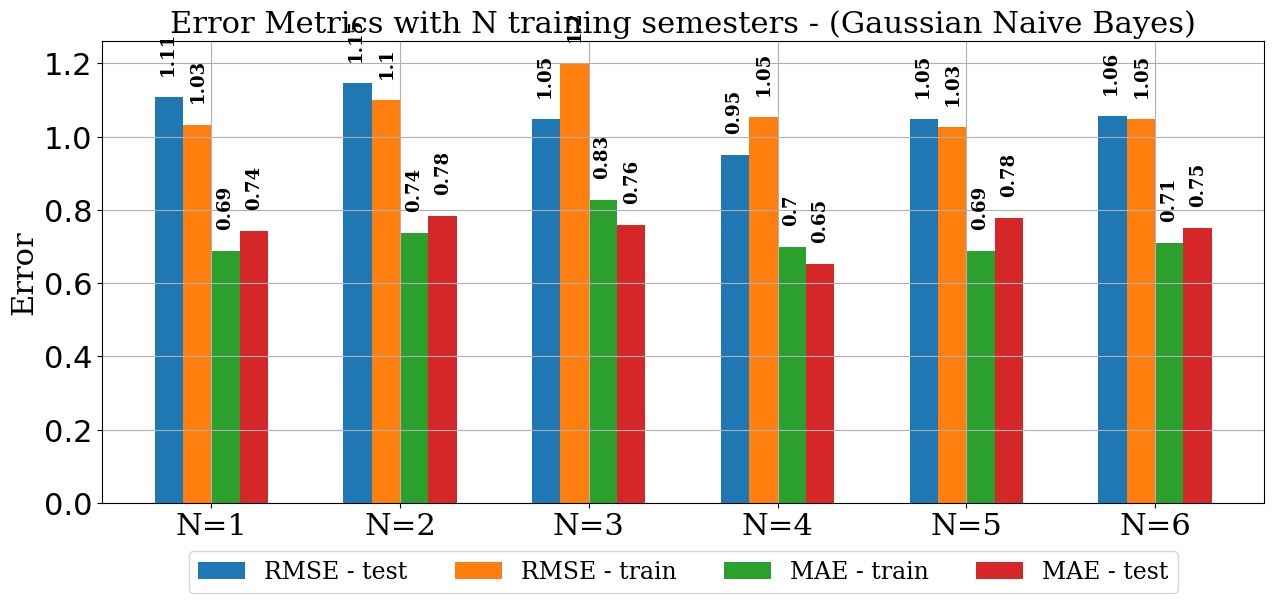

In [19]:
scores = get_error_score(df, columns, GaussianNB())
# print(scores)
model_results['GaussianNB'] = scores
plot_error_score(scores, 'Gaussian Naive Bayes')

[1, 2, 3, 4, 5, 6, 7]
training sem: [1]
test sem: 2
Train size  X: 3056, Test size: 3438
Train size Y : 3056, Test size: 3438
y test [1 3 0 ... 2 2 2]
y pred test [2 2 0 ... 2 2 2]
training sem: [1, 2]
test sem: 3
Train size  X: 6494, Test size: 3056
Train size Y : 6494, Test size: 3056
y test [0 0 1 ... 1 1 4]
y pred test [0 0 1 ... 1 1 1]
training sem: [1, 2, 3]
test sem: 4
Train size  X: 9550, Test size: 2674
Train size Y : 9550, Test size: 2674
y test [0 0 2 ... 2 2 1]
y pred test [0 0 1 ... 1 1 1]
training sem: [1, 2, 3, 4]
test sem: 5
Train size  X: 12224, Test size: 2292
Train size Y : 12224, Test size: 2292
y test [2 1 3 ... 0 1 1]
y pred test [1 1 1 ... 0 1 1]
training sem: [1, 2, 3, 4, 5]
test sem: 6
Train size  X: 14516, Test size: 3056
Train size Y : 14516, Test size: 3056
y test [2 2 2 ... 2 0 2]
y pred test [3 3 3 ... 3 0 3]
training sem: [1, 2, 3, 4, 5, 6]
test sem: 7
Train size  X: 17572, Test size: 1528
Train size Y : 17572, Test size: 1528
y test [3 3 2 ... 4 2 2]
y p

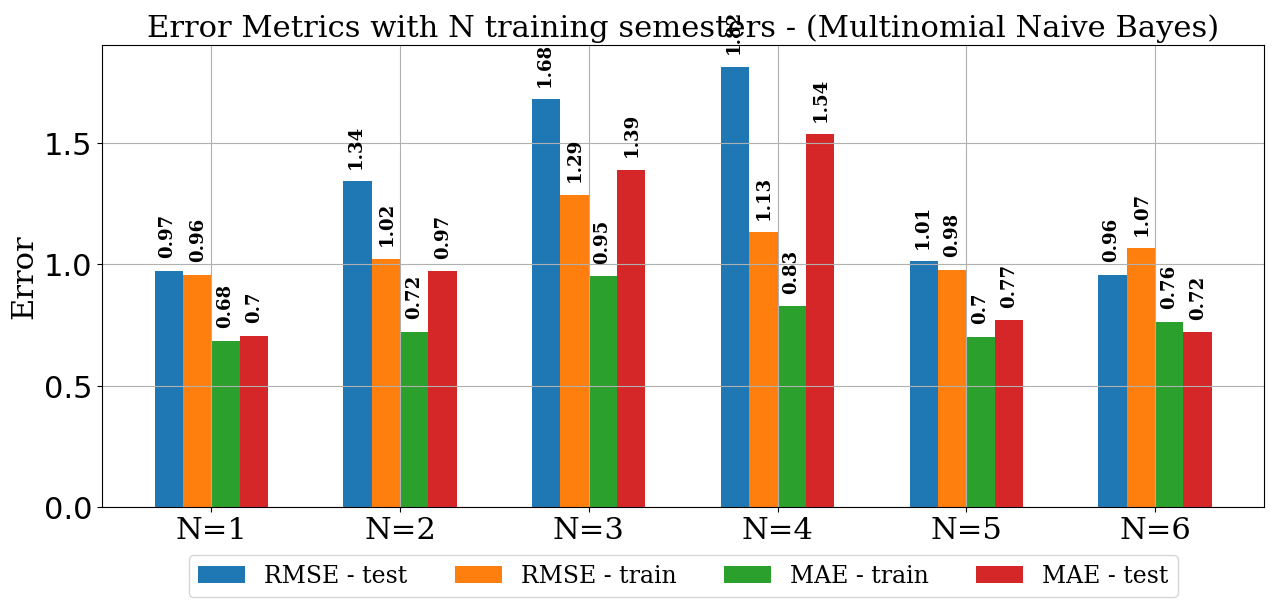

In [20]:
scores = get_error_score(df, columns, MultinomialNB())
model_results['MultinomialNB'] = scores
plot_error_score(scores, 'Multinomial Naive Bayes')

In [23]:


weights = [9, 8, 7, 6, 8, 4]
total_weight = sum(weights)

for model in model_results:
    weighted_rmse = 0
    weighted_mae = 0
    for i, key in enumerate(model_results[model], start=0):
        rmse = model_results[model][key]["rmse"][1]
        mae = model_results[model][key]["mae"][1]
        weight = weights[i]
        weighted_rmse += weight * rmse
        weighted_mae += weight * mae

    avg_rmse = weighted_rmse / total_weight
    avg_mae = weighted_mae / total_weight
    print(f"{model} - Weighted Avg RMSE: {avg_rmse}, MAE: {avg_mae}")


GaussianNB - Weighted Avg RMSE: 1.0668809523809526, MAE: 0.747452380952381
MultinomialNB - Weighted Avg RMSE: 1.2877619047619049, MAE: 1.0022619047619048


In [ ]:
import json
# Your results
results = {
    "chinese_gnb": {
        "WeightedAvgRMSE": 1.0668809523809526,
        "WeightedAvgMAE": 0.747452380952381
    },
}

# Save to JSON file
with open("chinese_gnb.json", "w") as f:
    json.dump(results, f, indent=4)

In [ ]:
import json
# Your results
results = {
    "chinese_mnb": {
        "WeightedAvgRMSE": 1.2877619047619049,
        "WeightedAvgMAE": 1.0022619047619048
    },
}

# Save to JSON file
with open("chinese_mnb.json", "w") as f:
    json.dump(results, f, indent=4)

In [21]:
with open('naive_bayes_results.json', 'w') as fw:
    json.dump(model_results, fw)